In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "abruzzo"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,13,Abruzzo,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,13,Abruzzo,0,0,0,0,0,0,0,...,0.0,8.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,13,Abruzzo,1,0,1,0,1,1,1,...,0.0,20.0,0.0,0.0,0.00,100.00,5.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,13,Abruzzo,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,13,Abruzzo,2,0,2,0,2,1,1,...,0.0,10.0,0.0,0.0,0.00,100.00,10.00,0.00,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2021-01-05T17:00:00,13,Abruzzo,471,39,510,10584,11094,-111,213,...,12.0,2393.0,837.0,-116.0,7.65,4.60,8.90,25.45,0.00,-0.99
316,2021-01-06T17:00:00,13,Abruzzo,463,39,502,10829,11331,237,365,...,2.0,4172.0,1450.0,245.0,7.77,4.43,8.75,25.17,0.00,2.14
317,2021-01-07T17:00:00,13,Abruzzo,478,36,514,10803,11317,-14,229,...,11.0,2284.0,753.0,-26.0,7.00,4.54,10.03,30.41,-7.69,-0.12
318,2021-01-08T17:00:00,13,Abruzzo,480,36,516,10581,11097,-220,160,...,4.0,2050.0,635.0,-222.0,6.98,4.65,7.80,25.20,0.00,-1.94


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 9, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 400
Nuovi tamponi: 4599.0
Percentuale nuovi positivi/nuovi tamponi: 9.0 %
Nuovi guariti: 229.0
Nuovi deceduti: 5.0
Variazione positivi ricoverati con sintomi: -17.0
Variazione positivi in terapia intensiva: 4.0
Variazione positivi in isolamento dimiciliare: 179.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 9, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-10T17:00:00,13,Abruzzo,530,46,576,9852,10428,556,746,...,26.0,4766.0,2352.0,541.0,7.99,5.52,15.65,31.72,-4.17,5.63
1,2020-11-11T17:00:00,13,Abruzzo,546,51,597,10353,10950,522,662,...,16.0,4223.0,2083.0,501.0,8.54,5.45,15.68,31.78,10.87,5.01
2,2020-11-12T17:00:00,13,Abruzzo,547,52,599,10817,11416,466,541,...,2.0,2636.0,979.0,464.0,8.68,5.25,20.52,55.26,1.96,4.26
3,2020-11-13T17:00:00,13,Abruzzo,567,57,624,11284,11908,492,683,...,15.0,4769.0,2244.0,467.0,9.13,5.24,14.32,30.44,9.62,4.31
4,2020-11-14T17:00:00,13,Abruzzo,545,59,604,12018,12622,714,939,...,10.0,5183.0,2604.0,734.0,9.77,4.79,18.12,36.06,3.51,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-05T17:00:00,13,Abruzzo,471,39,510,10584,11094,-111,213,...,12.0,2393.0,837.0,-116.0,7.65,4.60,8.90,25.45,0.00,-0.99
57,2021-01-06T17:00:00,13,Abruzzo,463,39,502,10829,11331,237,365,...,2.0,4172.0,1450.0,245.0,7.77,4.43,8.75,25.17,0.00,2.14
58,2021-01-07T17:00:00,13,Abruzzo,478,36,514,10803,11317,-14,229,...,11.0,2284.0,753.0,-26.0,7.00,4.54,10.03,30.41,-7.69,-0.12
59,2021-01-08T17:00:00,13,Abruzzo,480,36,516,10581,11097,-220,160,...,4.0,2050.0,635.0,-222.0,6.98,4.65,7.80,25.20,0.00,-1.94


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

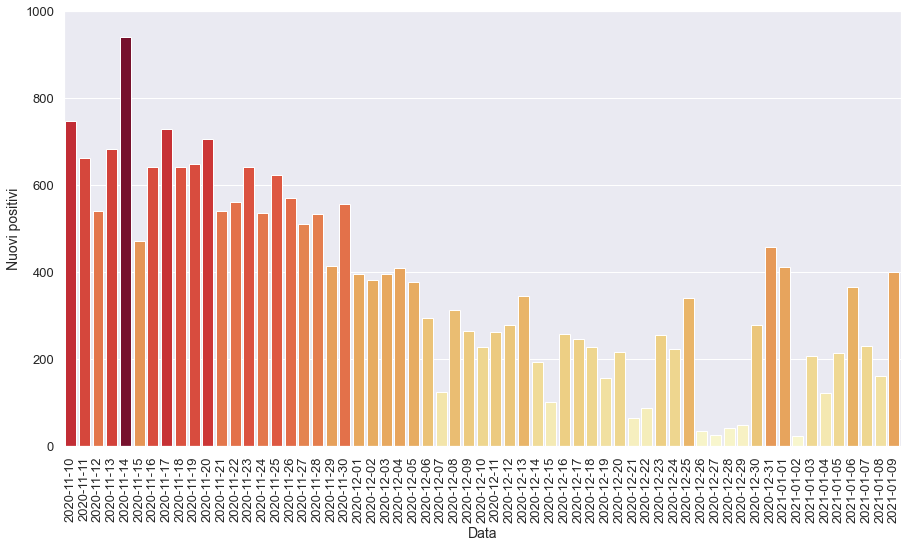

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

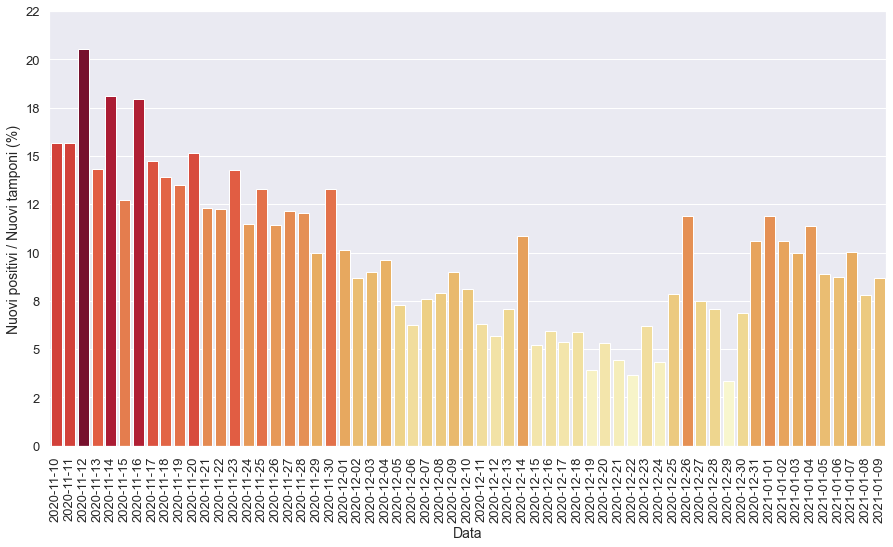

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

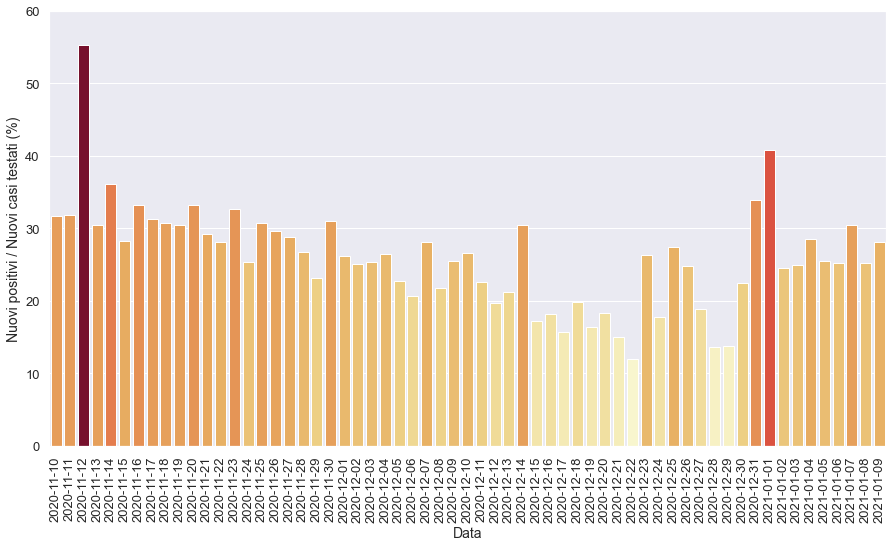

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

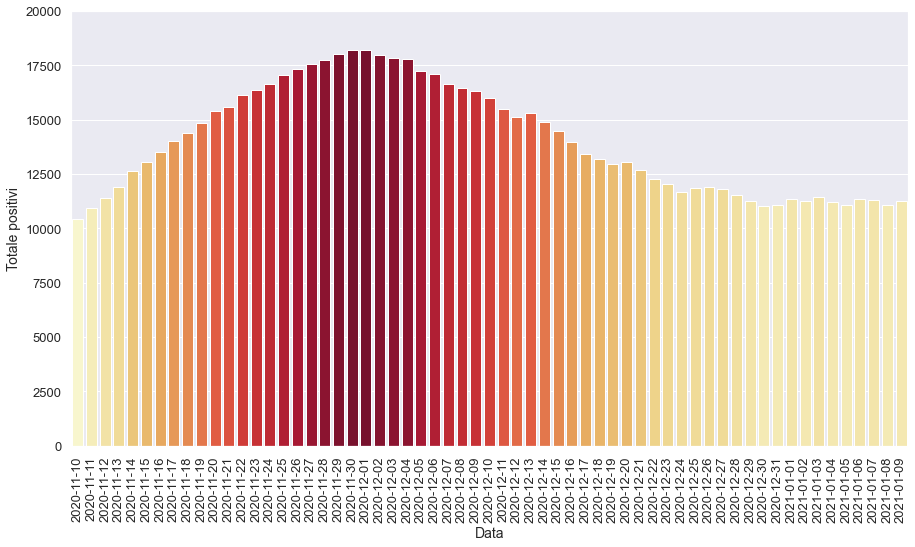

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

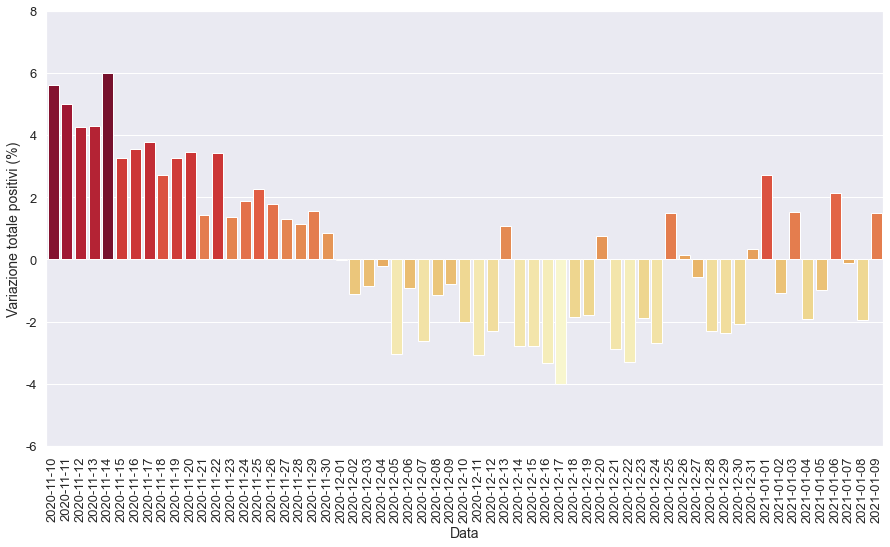

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

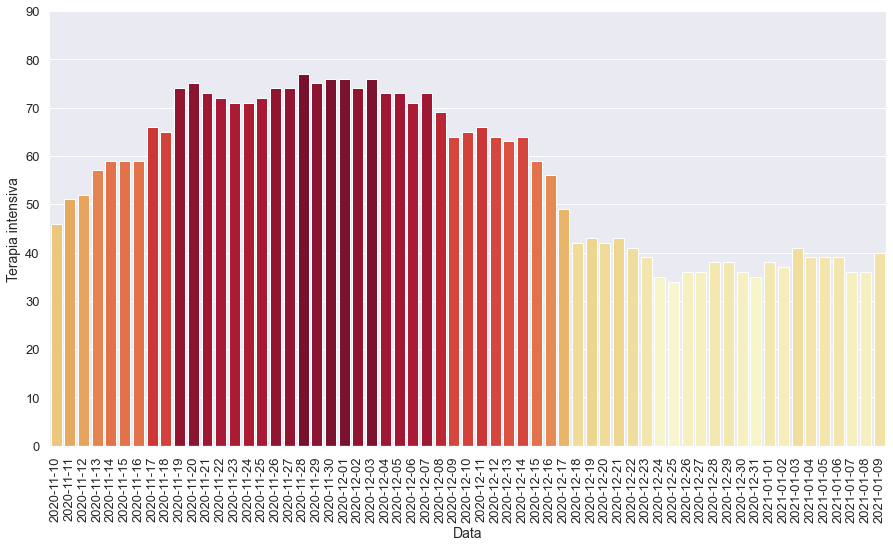

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

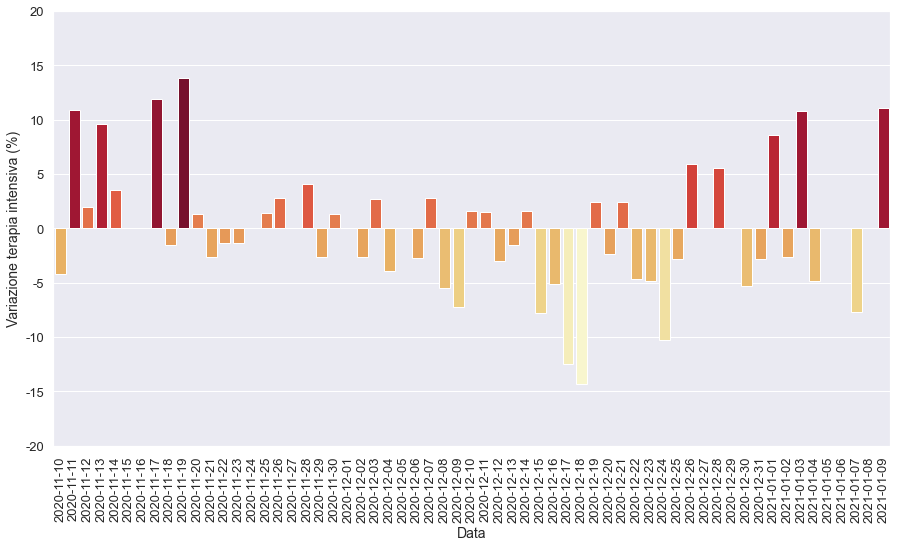

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

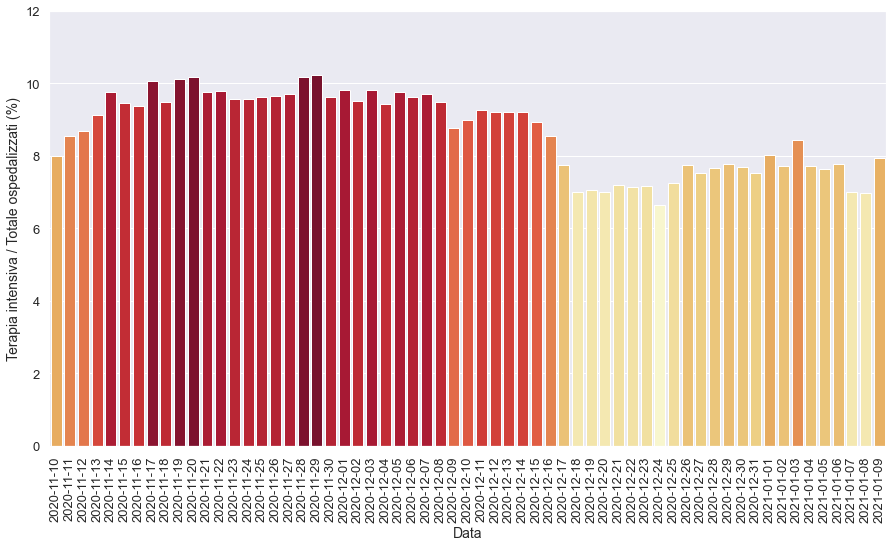

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

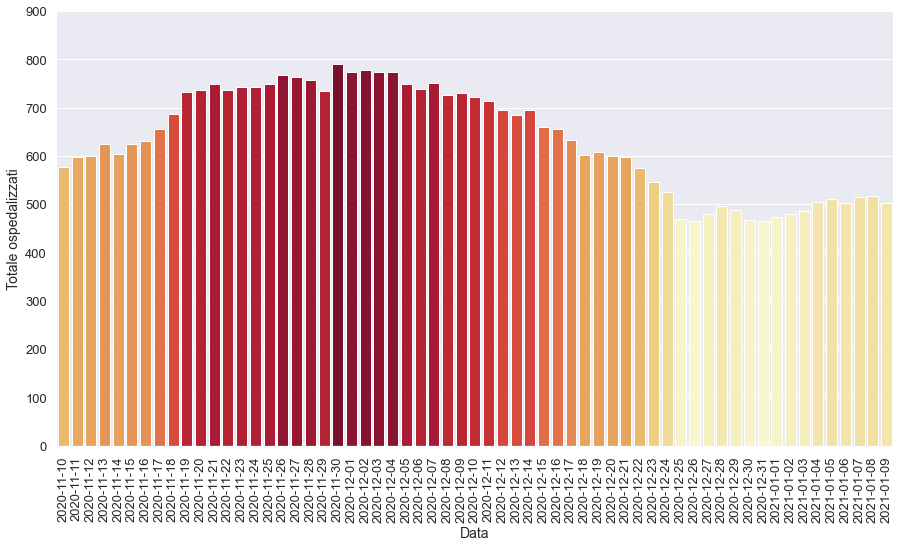

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

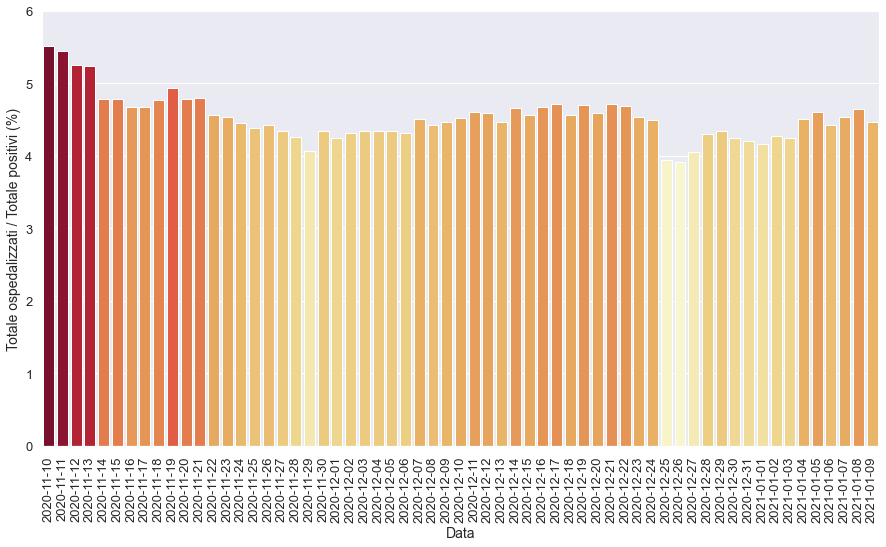

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

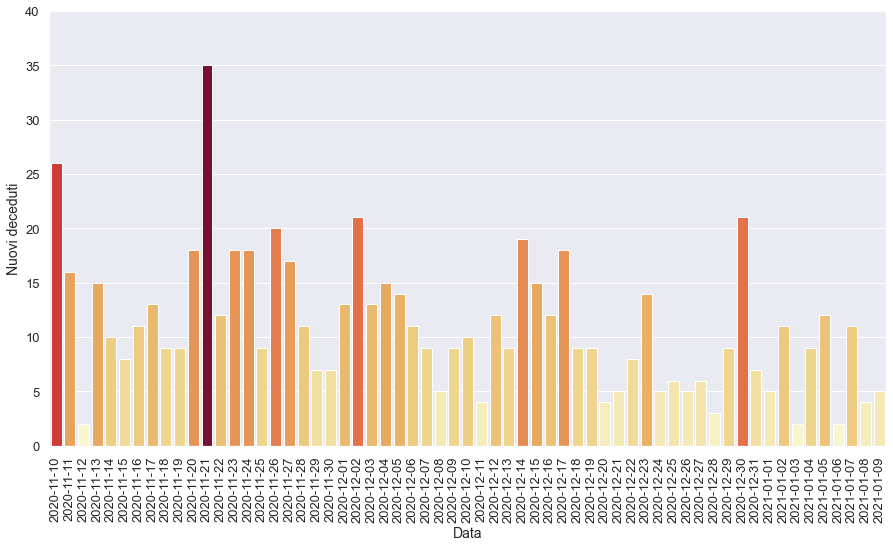

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

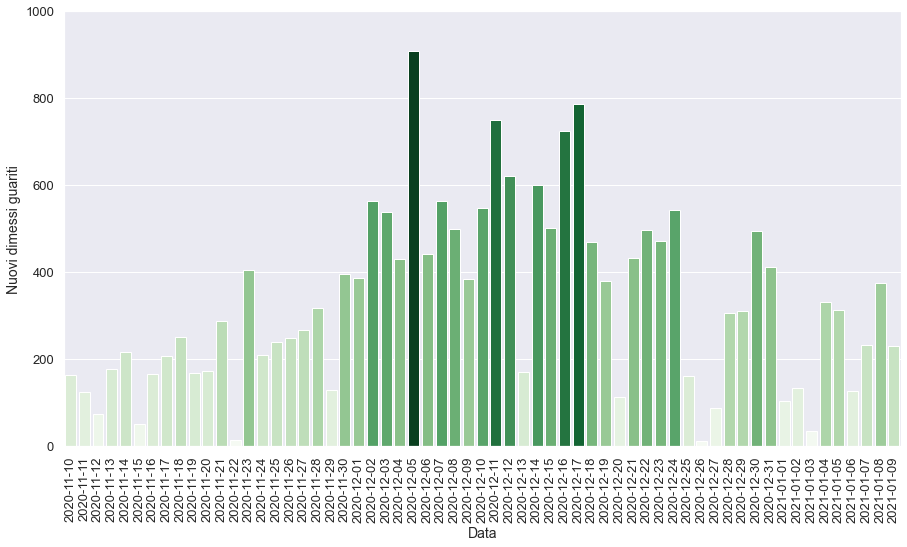

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-10T17:00:00,13,Abruzzo,657,65,722,15269,15991,-330,227,...,10.0,2792.0,855.0,-322.0,9.00,4.52,8.13,26.55,1.56,-2.02
1,2020-12-11T17:00:00,13,Abruzzo,647,66,713,14786,15499,-492,262,...,4.0,4148.0,1160.0,-483.0,9.26,4.60,6.32,22.59,1.54,-3.08
2,2020-12-12T17:00:00,13,Abruzzo,631,64,695,14449,15144,-355,277,...,12.0,4859.0,1402.0,-337.0,9.21,4.59,5.70,19.76,-3.03,-2.29
3,2020-12-13T17:00:00,13,Abruzzo,622,63,685,14624,15309,165,344,...,9.0,4858.0,1620.0,175.0,9.20,4.47,7.08,21.23,-1.56,1.09
4,2020-12-14T17:00:00,13,Abruzzo,630,64,694,14188,14882,-427,192,...,19.0,1766.0,629.0,-436.0,9.22,4.66,10.87,30.52,1.59,-2.79
5,2020-12-15T17:00:00,13,Abruzzo,601,59,660,13807,14467,-415,100,...,15.0,1917.0,581.0,-381.0,8.94,4.56,5.22,17.21,-7.81,-2.79
6,2020-12-16T17:00:00,13,Abruzzo,599,56,655,13331,13986,-481,257,...,12.0,4309.0,1416.0,-476.0,8.55,4.68,5.96,18.15,-5.08,-3.32
7,2020-12-17T17:00:00,13,Abruzzo,584,49,633,12792,13425,-561,246,...,18.0,4566.0,1572.0,-539.0,7.74,4.72,5.39,15.65,-12.50,-4.01
8,2020-12-18T17:00:00,13,Abruzzo,559,42,601,12574,13175,-250,227,...,9.0,3855.0,1141.0,-218.0,6.99,4.56,5.89,19.89,-14.29,-1.86
9,2020-12-19T17:00:00,13,Abruzzo,565,43,608,12332,12940,-235,156,...,9.0,3989.0,953.0,-242.0,7.07,4.70,3.91,16.37,2.38,-1.78


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

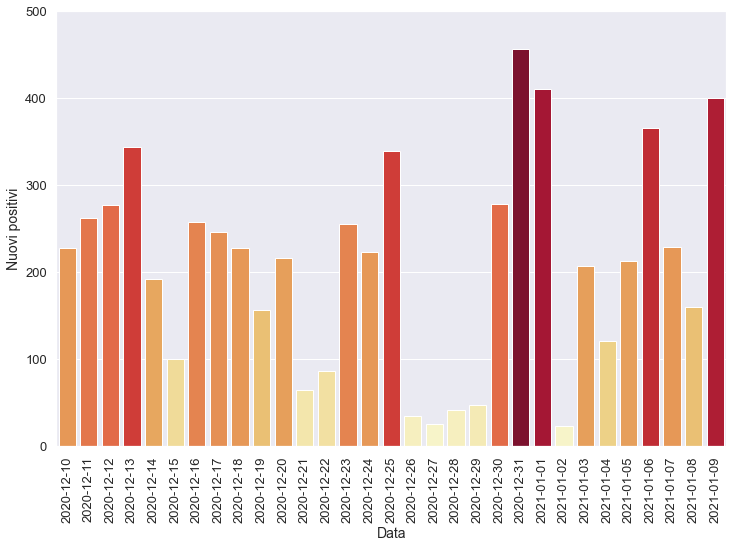

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

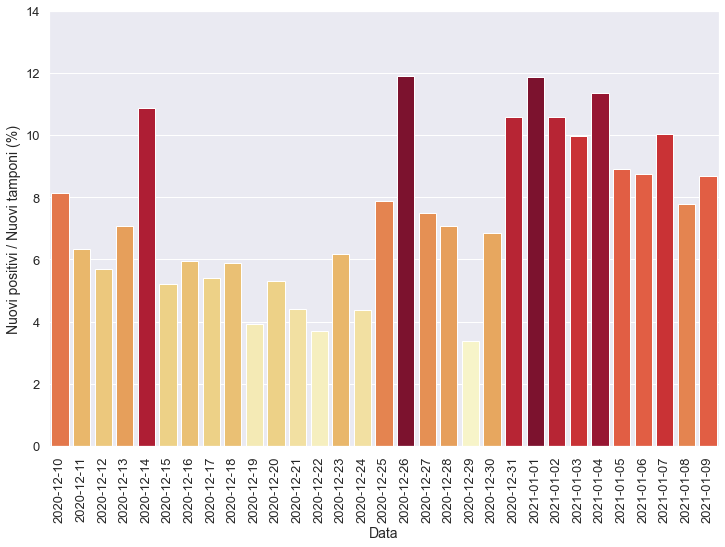

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

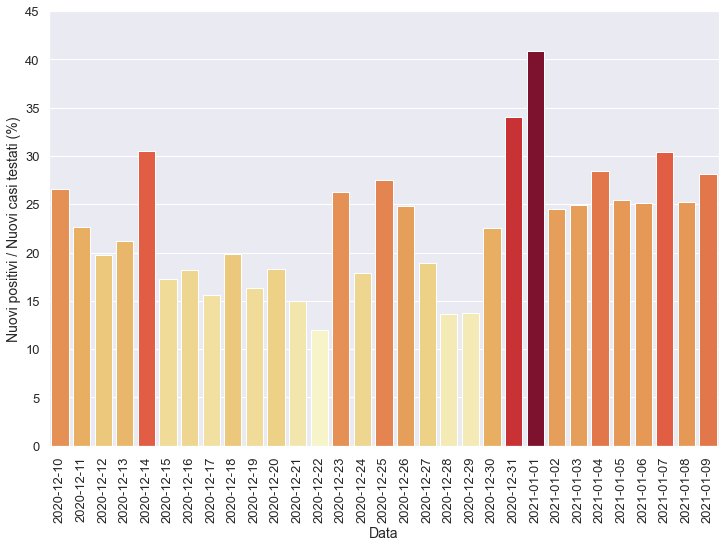

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

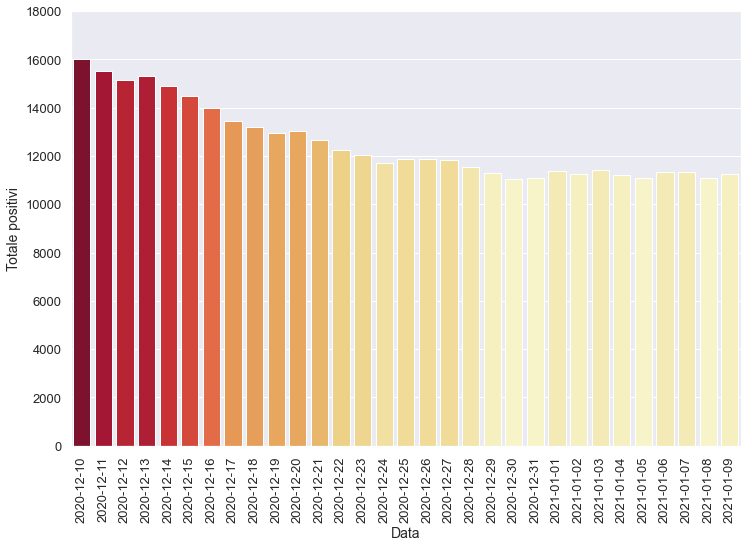

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

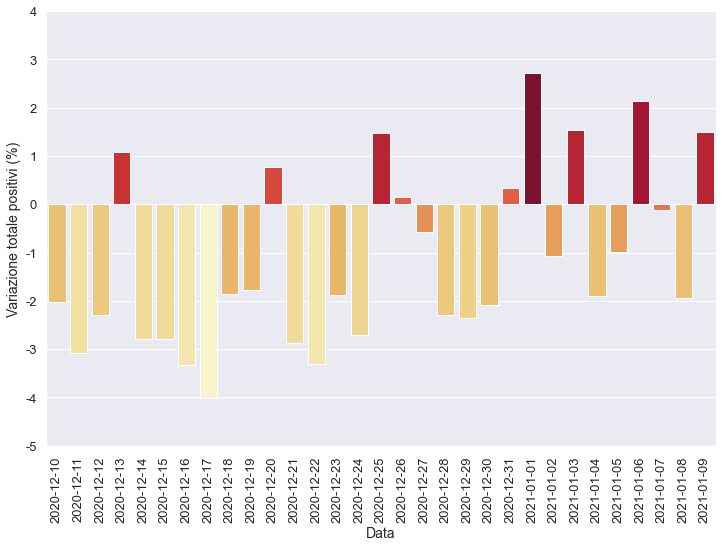

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

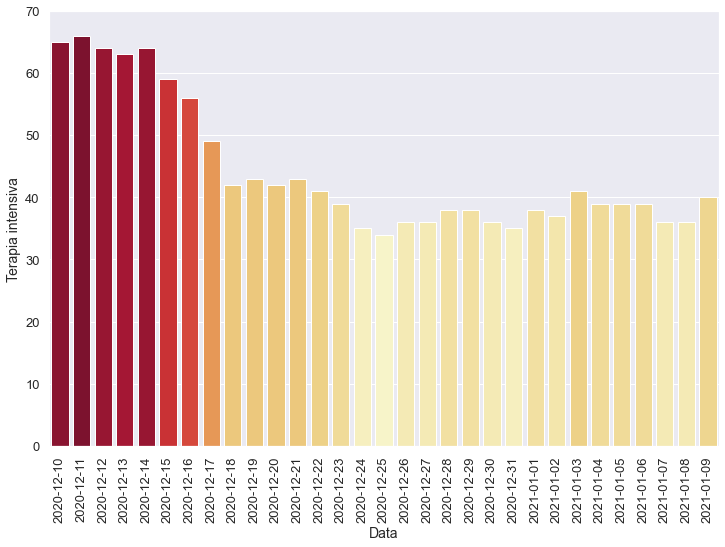

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

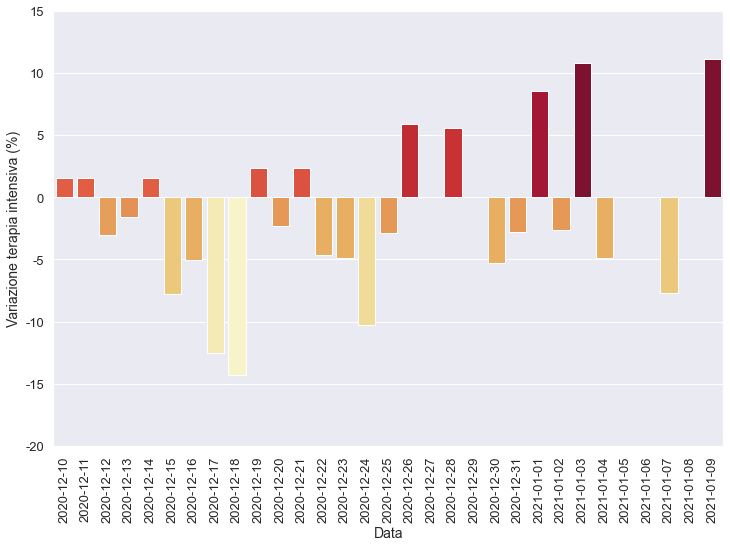

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

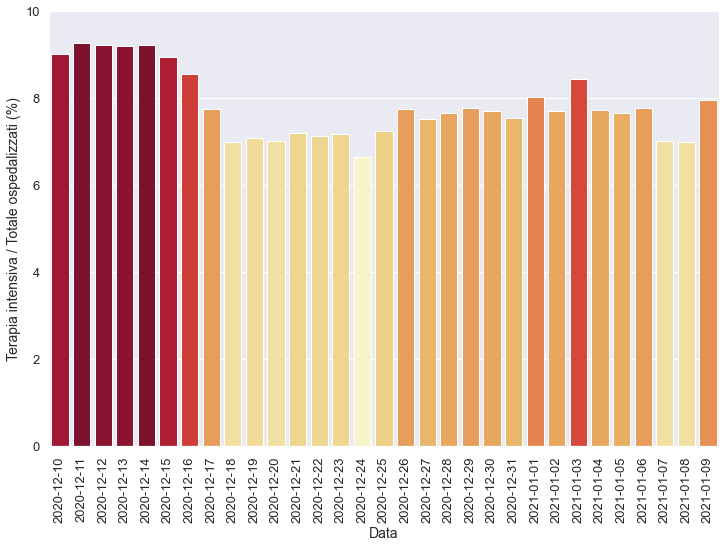

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

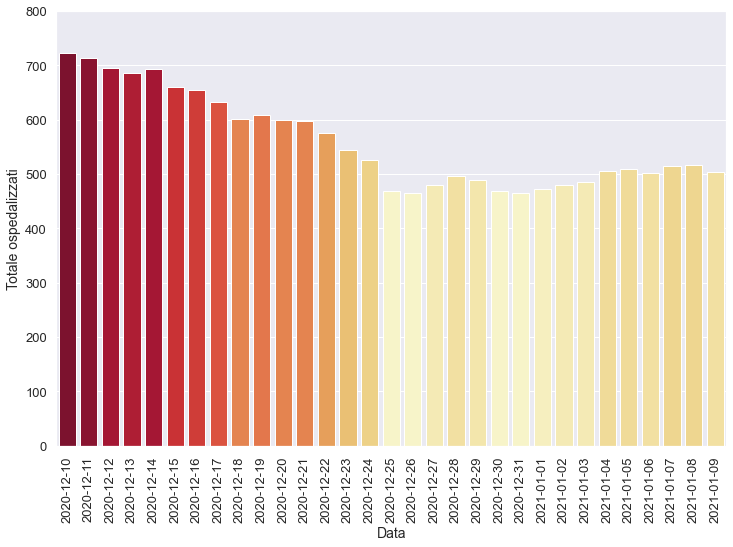

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

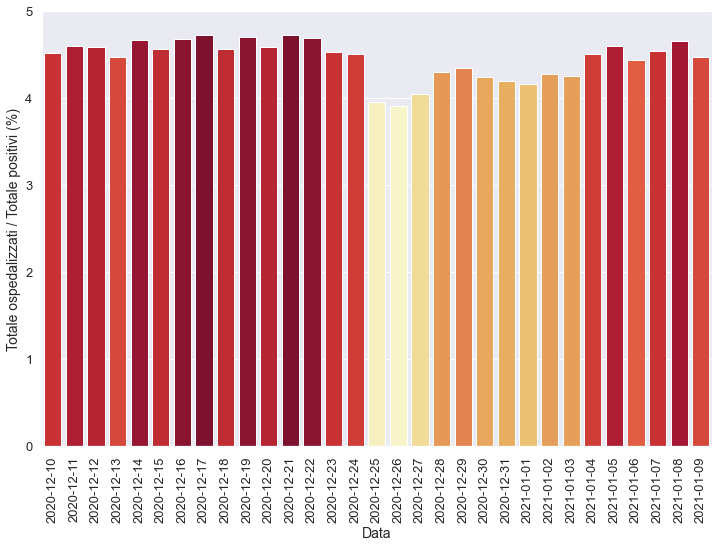

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

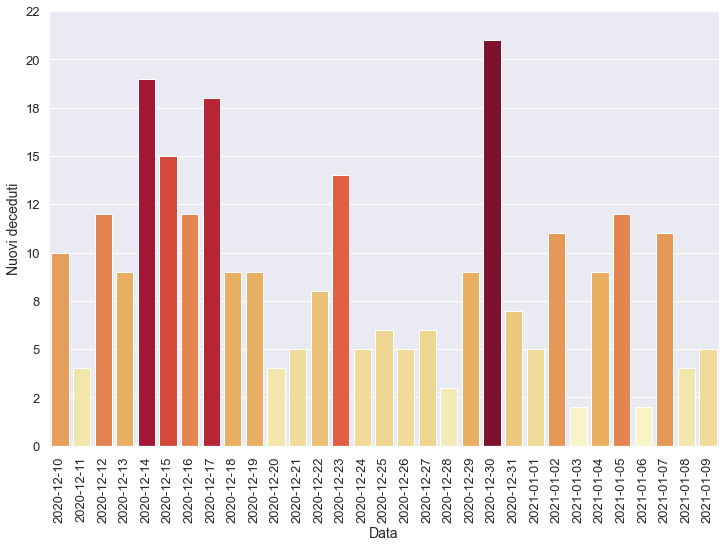

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

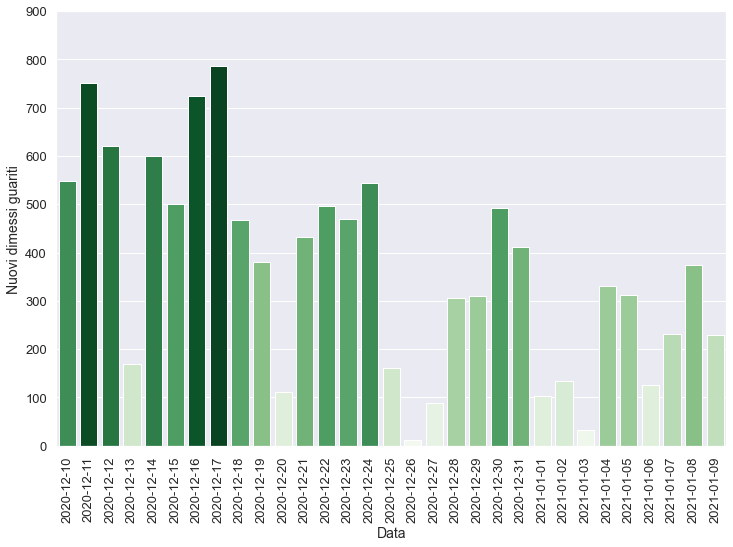

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-02T17:00:00,13,Abruzzo,443,37,480,10771,11251,-122,23,...,11.0,217.0,94.0,-129.0,7.71,4.27,10.60,24.47,-2.63,-1.07
1,2021-01-03T17:00:00,13,Abruzzo,445,41,486,10937,11423,172,207,...,2.0,2077.0,831.0,166.0,8.44,4.25,9.97,24.91,10.81,1.53
2,2021-01-04T17:00:00,13,Abruzzo,466,39,505,10700,11205,-218,121,...,9.0,1065.0,425.0,-237.0,7.72,4.51,11.36,28.47,-4.88,-1.91
3,2021-01-05T17:00:00,13,Abruzzo,471,39,510,10584,11094,-111,213,...,12.0,2393.0,837.0,-116.0,7.65,4.60,8.90,25.45,0.00,-0.99
4,2021-01-06T17:00:00,13,Abruzzo,463,39,502,10829,11331,237,365,...,2.0,4172.0,1450.0,245.0,7.77,4.43,8.75,25.17,0.00,2.14
5,2021-01-07T17:00:00,13,Abruzzo,478,36,514,10803,11317,-14,229,...,11.0,2284.0,753.0,-26.0,7.00,4.54,10.03,30.41,-7.69,-0.12
6,2021-01-08T17:00:00,13,Abruzzo,480,36,516,10581,11097,-220,160,...,4.0,2050.0,635.0,-222.0,6.98,4.65,7.80,25.20,0.00,-1.94
7,2021-01-09T17:00:00,13,Abruzzo,463,40,503,10760,11263,166,400,...,5.0,4599.0,1423.0,179.0,7.95,4.47,8.70,28.11,11.11,1.50


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

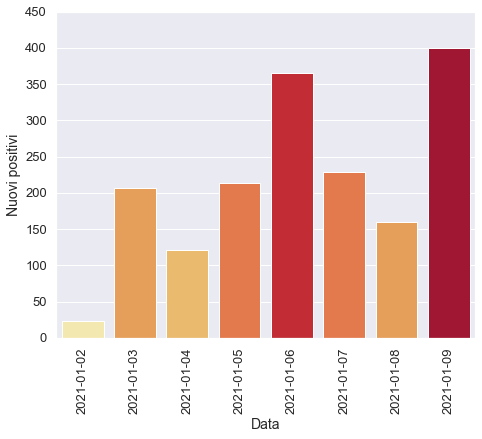

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

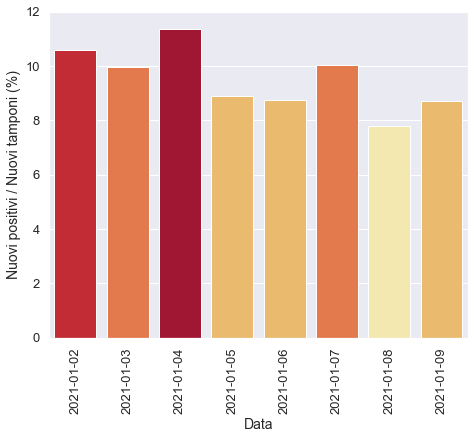

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

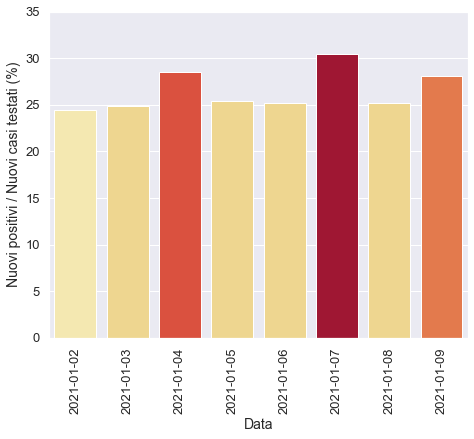

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

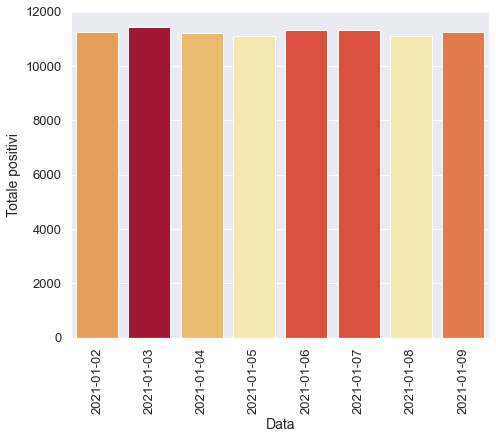

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

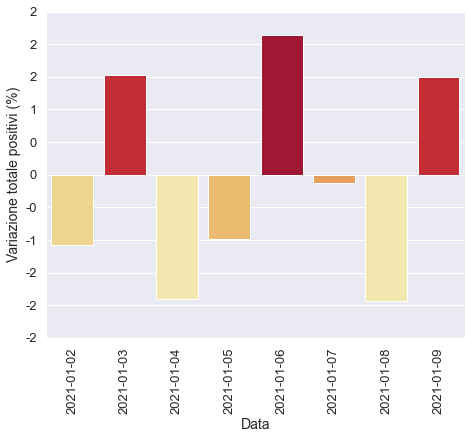

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

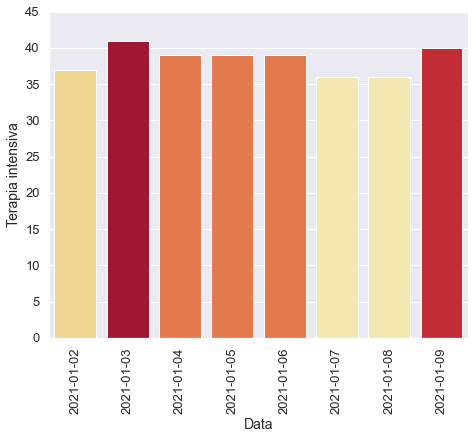

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

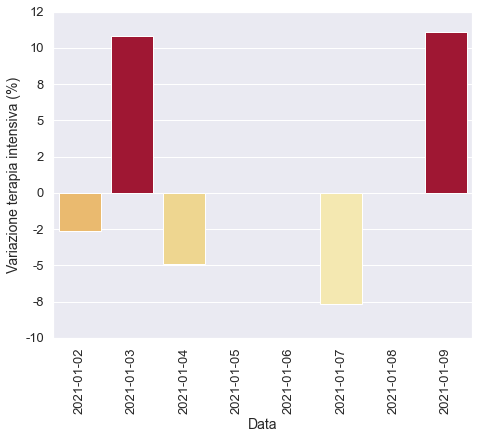

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

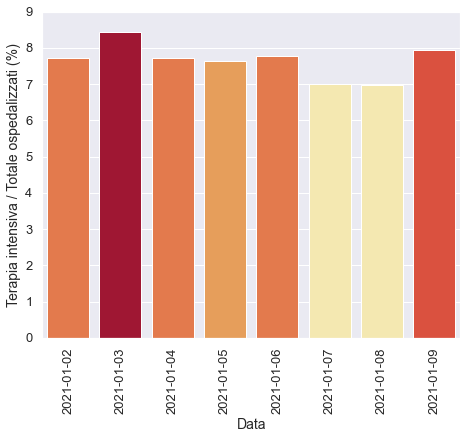

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

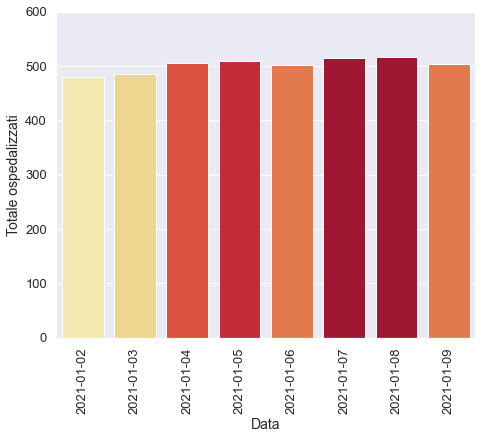

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

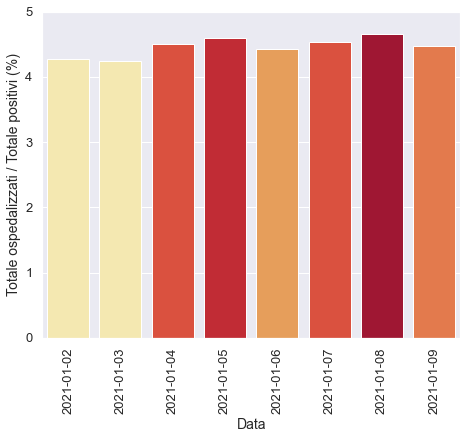

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

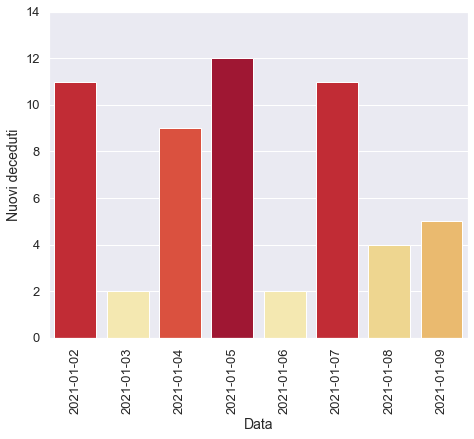

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

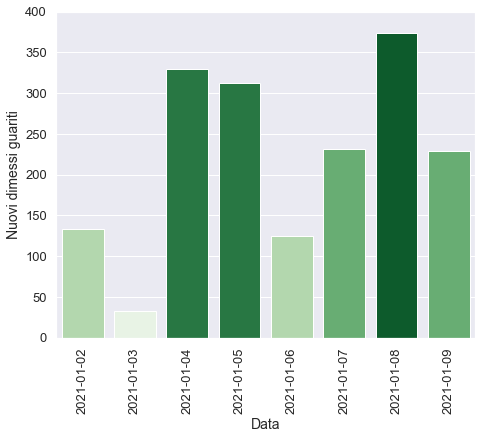

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)